In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow.keras as keras
from tensorflow.keras import layers, models
import sklearn as sk
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import tensorflow.keras.applications.resnet50

In [2]:
(x_train, y_train), (x_test, y_test) =keras.datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

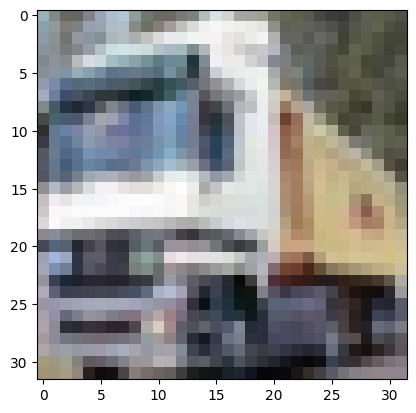

In [4]:
plt.imshow(x_train[1])

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[1]

array([9], dtype=uint8)

In [7]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [8]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=700, activation='relu'))
model.add(layers.Dense(units=500, activation='relu'))
model.add(layers.Dense(units=300, activation='relu'))
model.add(layers.Dense(units=150, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))



# Model summary
model.summary()


c:\Users\gg\anaconda3\envs\deep\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 700)            │     2,195,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       350,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 300)            │       150,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 150)            │        45,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,748,880 (10.49 MB)

 Trainable params: 2,748,880 (10.49 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=4, mode='min', restore_best_weights=True)

In [12]:
#model.fit(x_train , y_train, epochs=10,validation_data=(x_test, y_test),callbacks=early_stopping)

In [13]:
final_train_predictions = np.argmax(model.predict(x_train), axis=1)
final_test_predictions = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_train, final_train_predictions))
print(classification_report(y_test, final_test_predictions))

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5000
           1       0.10      0.94      0.18      5000
           2       0.06      0.02      0.03      5000
           3       0.00      0.00      0.00      5000
           4       0.00      0.00      0.00      5000
           5       0.00      0.00      0.00      5000
           6       0.00      0.00      0.00      5000
           7       0.00      0.00      0.00      5000
           8       0.00      0.00      0.00      5000
           9       0.01      0.00      0.00      5000

    accuracy                           0.10     50000
   macro avg       0.02      0.10      0.02     50000
weighted avg       0.02      0.10      0.02     50000

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.10      0.94      0.18     

c:\Users\gg\anaconda3\envs\deep\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gg\anaconda3\envs\deep\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gg\anaconda3\envs\deep\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gg\anacond

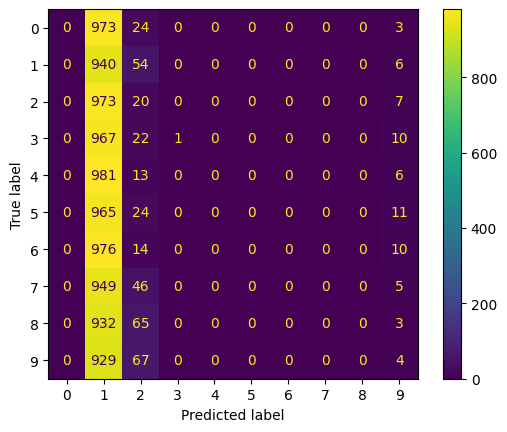

In [14]:
cm=confusion_matrix(y_test, final_test_predictions)
cm_display = sk.metrics.ConfusionMatrixDisplay(cm).plot()
plt.show()

In [15]:
base_model=keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    pooling='avg',
    )

In [16]:
for layer in base_model.layers[:-3]:
    layer.trainable=False

In [17]:
final_model=keras.Sequential(
    [base_model,keras.layers.Dense(10,activation='softmax')]
)

In [18]:
final_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,608,202 (90.06 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [20]:
final_model=keras.Sequential(
    [base_model,keras.layers.Dense(10,activation='softmax')]
)

In [29]:
final_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
final_model.fit(x_train , y_train, epochs=10,validation_data=(x_test, y_test),callbacks=early_stopping)


Epoch 1/10
 102/1563 ━━━━━━━━━━━━━━━━━━━━ 1:50 75ms/step - accuracy: 0.1333 - loss: 2.4884